In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders import LeaveOneOutEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [84]:
df = pd.read_csv('heart.csv')

In [85]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [87]:
df.duplicated().sum()

#Duplication in Patient_ID
df.duplicated(subset='Patient ID').sum()

#Drop the 'Person ID' column
df.drop('Patient ID', axis=1, inplace=True)

In [88]:
# Check for missing values
print(df.isnull().sum())

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [89]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [90]:
import seaborn as sb 
import matplotlib.pyplot as mp 

In [91]:
#"Blood Pressure" variable needs to be edited.

df["Blood_Sistolik_Pres"] = df["Blood Pressure"].apply(lambda x: x.split("/")[0]).astype(int)
df["Blood_Diyastolik _Pres"] = df["Blood Pressure"].apply(lambda x: x.split("/")[1]).astype(int)
df.drop("Blood Pressure", axis=1, inplace=True)

In [92]:
df["Blood_Sistolik_Pres"]

0       158
1       165
2       174
3       163
4        91
       ... 
8758     94
8759    157
8760    161
8761    119
8762    138
Name: Blood_Sistolik_Pres, Length: 8763, dtype: int32

In [93]:
df["Blood_Diyastolik _Pres"]

0        88
1        93
2        99
3       100
4        88
       ... 
8758     76
8759    102
8760     75
8761     67
8762     67
Name: Blood_Diyastolik _Pres, Length: 8763, dtype: int32

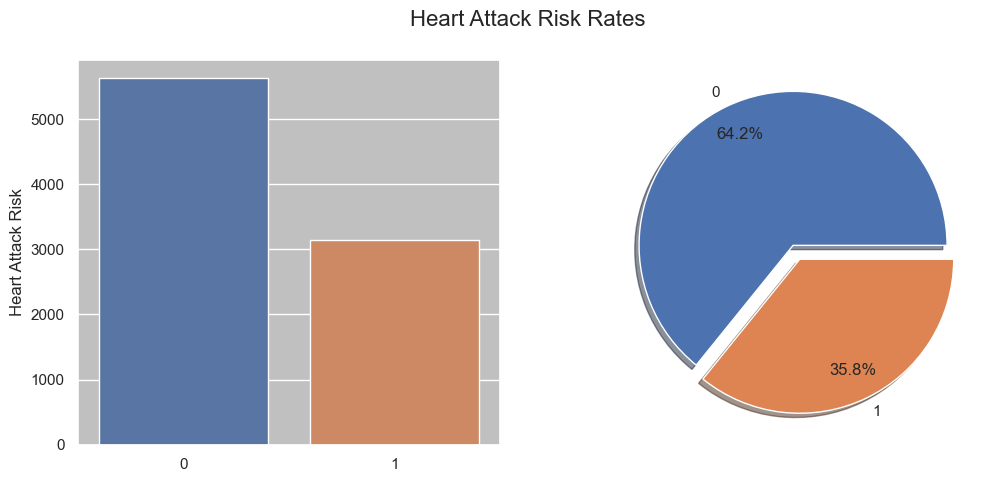

In [94]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.set(rc={'axes.facecolor':'c0c0c0', 'figure.facecolor':'lightblue'})
plt.subplot(1, 2, 1)
sns.barplot(x=df["Heart Attack Risk"].value_counts().index, y=df["Heart Attack Risk"].value_counts())
plt.subplot(1, 2, 2)
plt.pie(x=df["Heart Attack Risk"].value_counts(), autopct="%.1f%%", pctdistance=0.8,
        labels= df["Heart Attack Risk"].value_counts().index, shadow=True, explode=[0.05,0.05])
plt.suptitle("Heart Attack Risk Rates", fontsize=16)
plt.show()

**In this dataset, the number of people at risk of heart attack is almost half of the opposite group**

In [95]:
cat_fea_list = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Physical Activity Days Per Week',
        'Sleep Hours Per Day', 'Continent', 'Hemisphere', 'Country']

**In the set of graphs below, the number of people in this dataset is drawn depending on the different groups in which they are present**

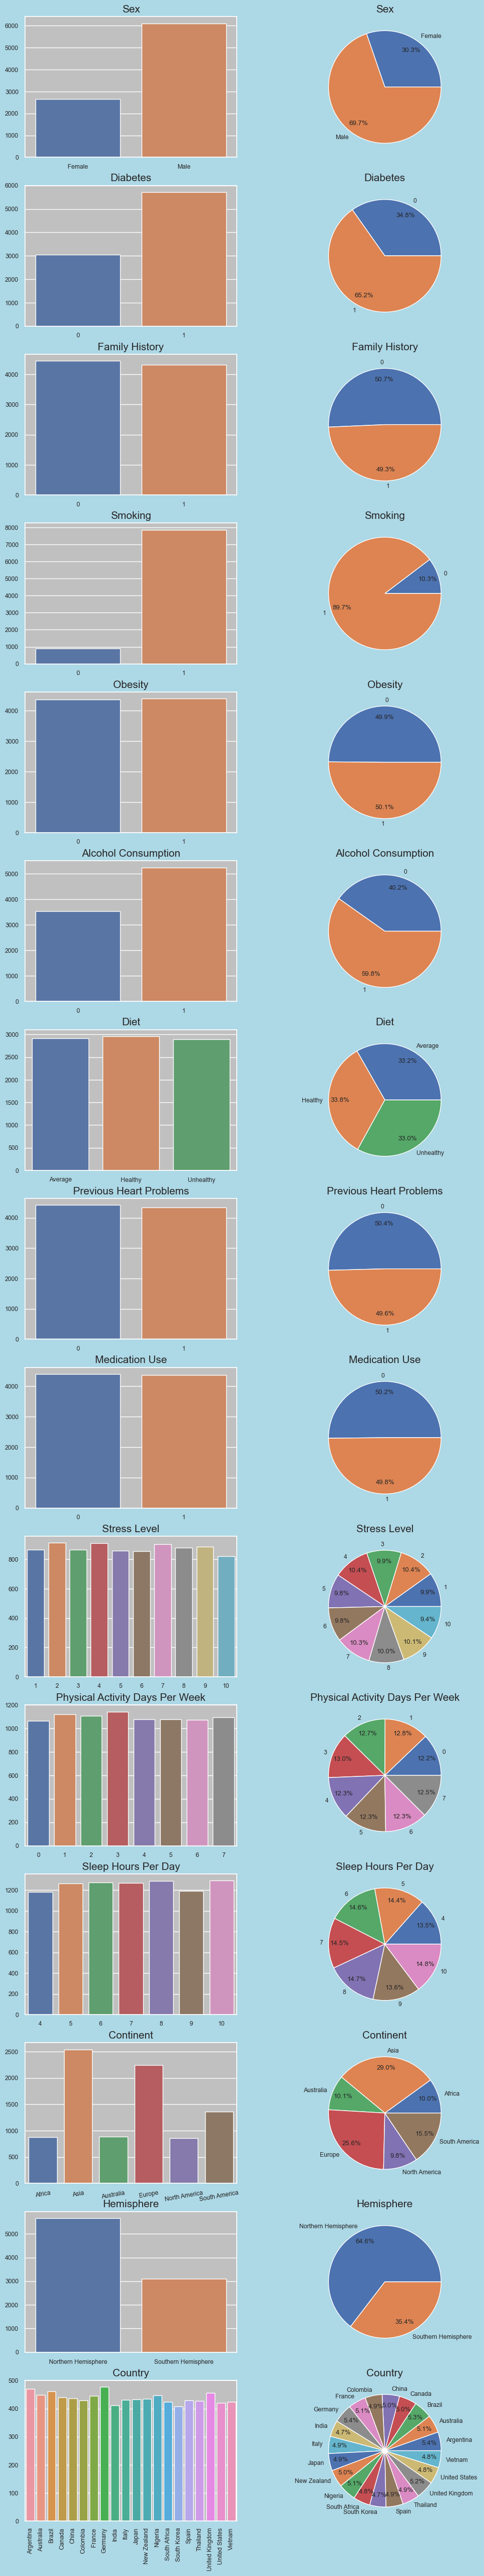

In [96]:
plt.figure(figsize=(12,65))
sns.set(rc={'axes.facecolor':'c0c0c0', 'figure.facecolor':'lightblue'}, font_scale=0.8)

i = 0
j = 0
for col in cat_fea_list:
    feature = df.groupby(col)[col].count()
    plt.subplot(15, 2, i+1)
    sns.barplot(x=feature.index, y=feature.values)
    plt.title(col, fontsize=15)
    plt.xlabel("")
    #plt.xlabel(col, fontsize=12, color="#8b1a1a")
    if col == "Country":
        plt.xticks(rotation=90)
    if col == "Continent":
        plt.xticks(rotation=10)
        
    plt.subplot(15, 2, j+2)
    plt.pie(x=feature.values, autopct="%.1f%%", pctdistance=0.8, labels=feature.index)
    plt.title(col, fontsize=15)
    #plt.xlabel(col, fontsize=12, color="#8b1a1a")
    i += 2
    j += 2
plt.show()


In [97]:
num_fea_list = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day',
                'Income', 'BMI', 'Triglycerides', 'Blood_Sistolik_Pres', 'Blood_Diyastolik _Pres']

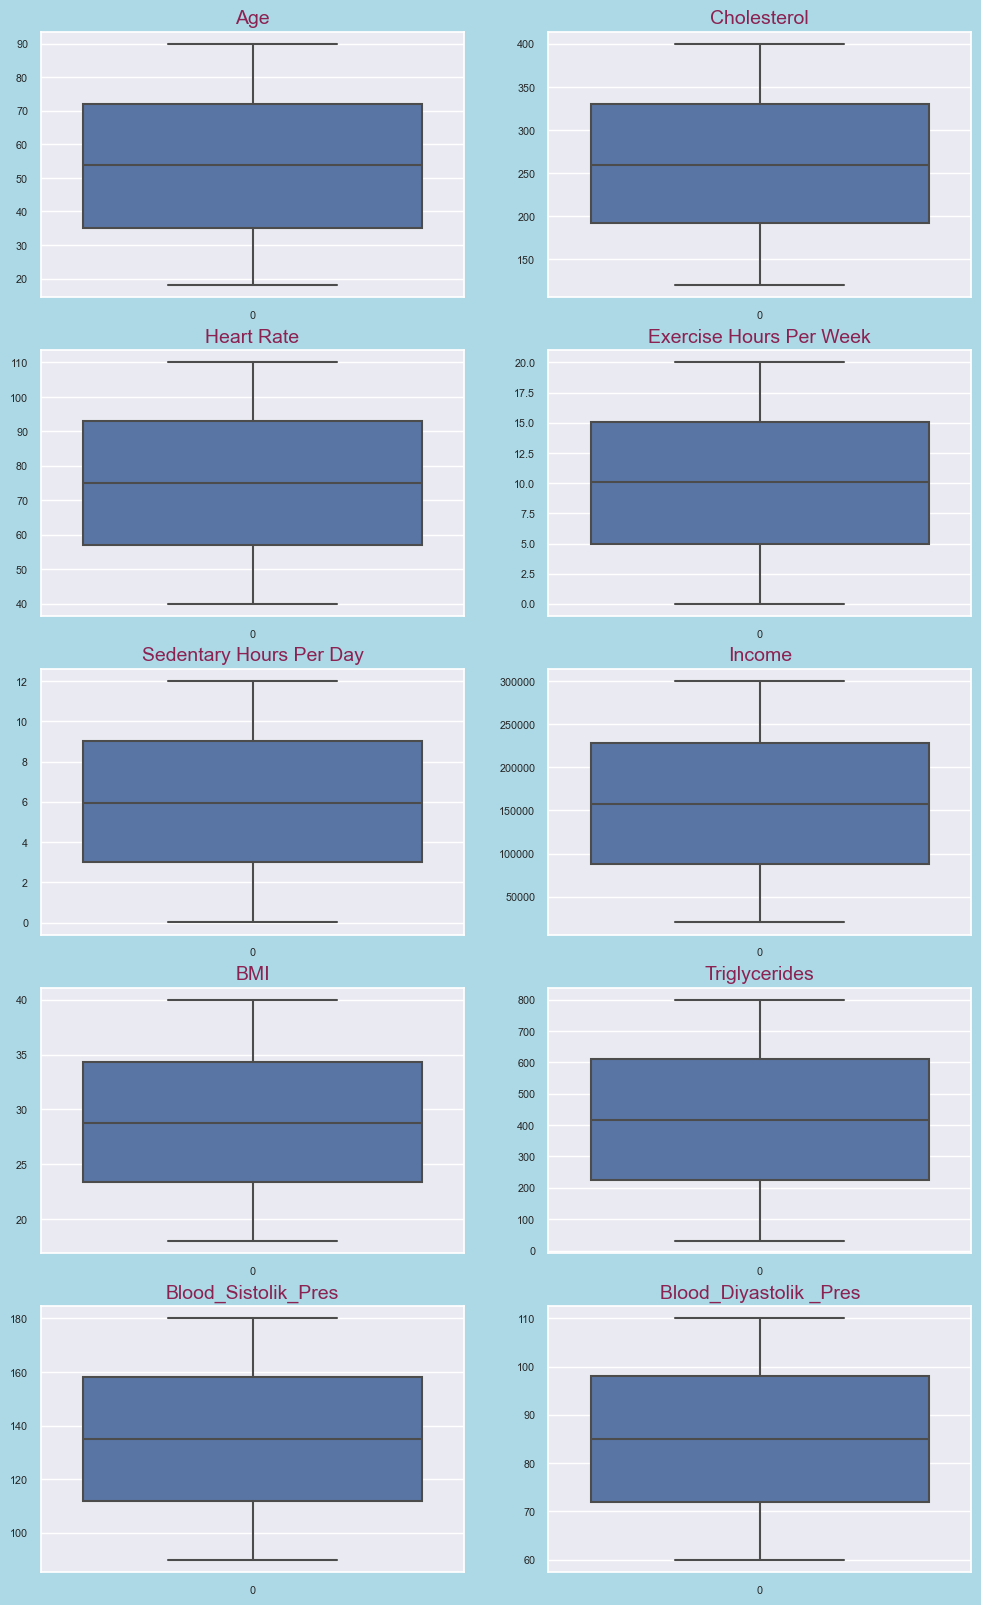

In [98]:
plt.figure(figsize=(12,20))
sns.set(rc={'figure.facecolor':'lightblue'}, font_scale=0.7)

for i, col in enumerate(num_fea_list):
    plt.subplot(5, 2, i+1)
    sns.boxplot(df[col])
    plt.title(col, fontsize=14, color="#8b2252")
    plt.xlabel("\n")
plt.show()

In [99]:
data = df.copy()

In [100]:
# To encode categorical variables
# 1 for Male, 0 for Female
# 1 for Southern Hemisphere, 0 for Northern Hemisphere

le = LabelEncoder()
data[["Sex", "Hemisphere"]] = data[["Sex", "Hemisphere"]].agg(le.fit_transform)

In [101]:
target_encoder = TargetEncoder()
data["Continent"] = target_encoder.fit_transform(data["Continent"], df["Heart Attack Risk"])
data["Country"] = target_encoder.fit_transform(data["Country"], df["Heart Attack Risk"])

In [102]:
data = pd.get_dummies(data=data, columns=["Diet"])

In [103]:
data = data[['Heart Attack Risk', 'Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
        'Blood_Sistolik_Pres', 'Blood_Diyastolik _Pres', 'Sedentary Hours Per Day', 'Income', 'BMI',
        'Triglycerides', 'Stress Level', 'Physical Activity Days Per Week', 'Sleep Hours Per Day',
        'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption','Previous Heart Problems',
        'Medication Use', 'Sex', 'Country', 'Continent', 'Hemisphere', 'Diet_Average', 'Diet_Healthy',
        'Diet_Unhealthy']]
data.head()

,Heart Attack Risk,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Blood_Sistolik_Pres,Blood_Diyastolik _Pres,Sedentary Hours Per Day,Income,BMI,...,Alcohol Consumption,Previous Heart Problems,Medication Use,Sex,Country,Continent,Hemisphere,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,0,67,208,72,4.168189,158,88,6.615001,261404,31.251233,...,0,0,0,1,0.369427,0.366373,1,1,0,0
1,0,21,389,98,1.813242,165,93,4.963459,285768,27.194973,...,1,1,0,1,0.359091,0.376744,0,0,0,1
2,0,21,324,72,2.078353,174,99,9.463426,235282,28.176571,...,0,1,1,0,0.352018,0.345828,0,0,1,0
3,0,84,383,73,9.828130,163,100,7.648981,125640,36.464704,...,1,1,0,1,0.359091,0.376744,0,1,0,0
4,0,66,318,93,5.804299,91,88,1.514821,160555,21.809144,...,0,1,0,1,0.376168,0.353913,0,0,0,1


In [104]:
heart_attack_corr = data.corr()["Heart Attack Risk"]
heart_attack_corr = heart_attack_corr.drop("Heart Attack Risk", axis=0).sort_values(ascending=False)

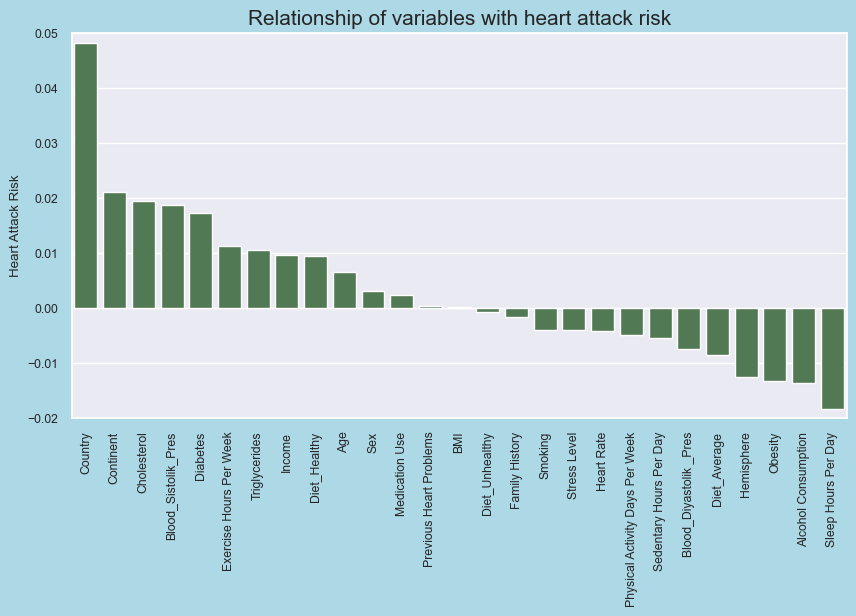

In [105]:
plt.figure(figsize=(10,5))
sns.set(font_scale=0.8)
sns.barplot(x=heart_attack_corr.index, y=heart_attack_corr, color="#4a804d")
plt.xticks(rotation=90)
plt.ylim(-0.02, 0.05)
plt.title("Relationship of variables with heart attack risk", fontsize=15)
plt.show()

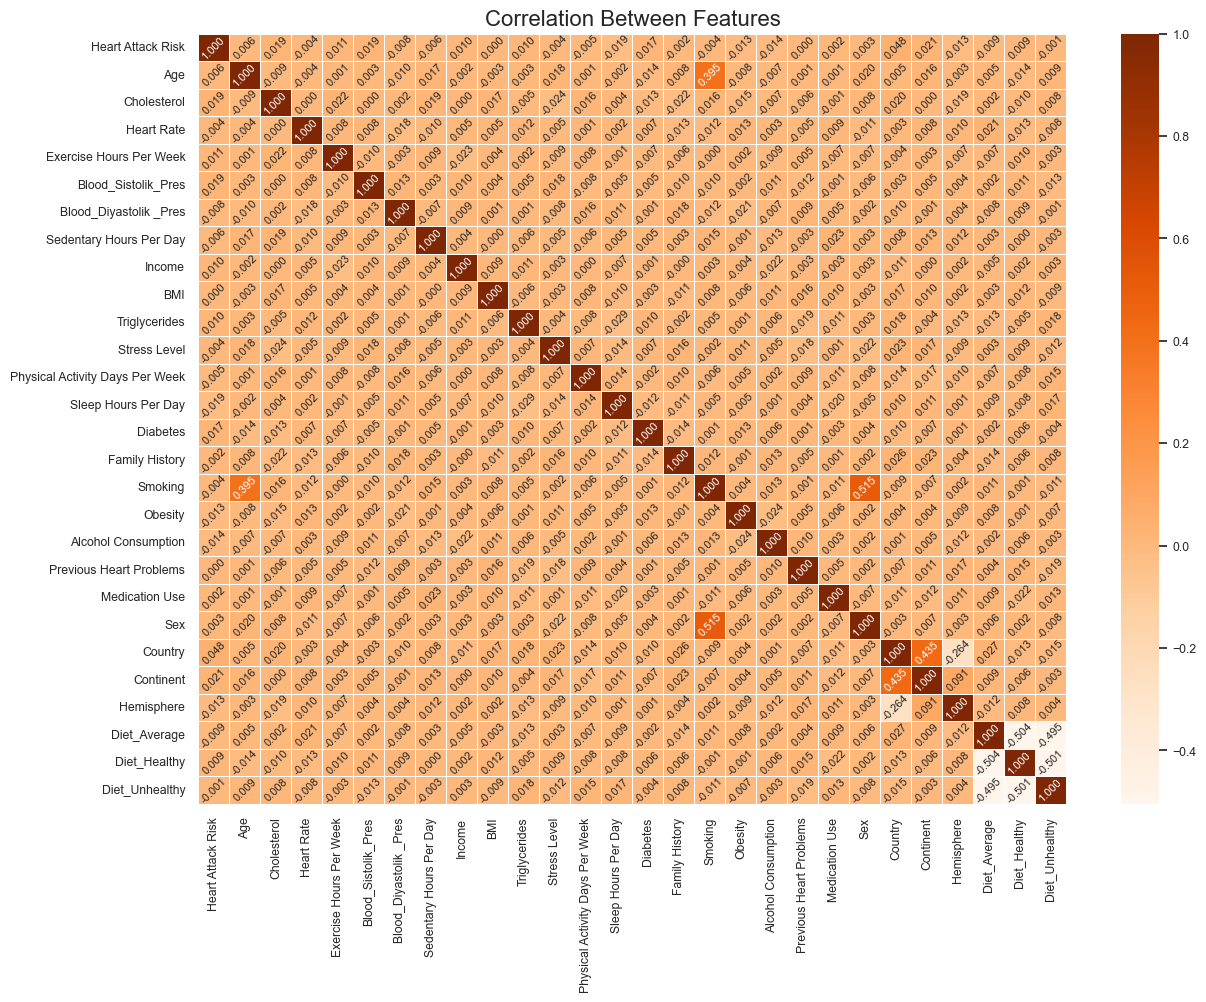

In [106]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.4, fmt='.3f', cmap="Oranges", annot_kws={'size': 8, 'rotation': 45})
plt.title("Correlation Between Features", fontsize=16)
plt.show()


           Country  Counts
0        Argentina     471
1        Australia     449
2           Brazil     462
3           Canada     440
4            China     436
5         Colombia     429
6           France     446
7          Germany     477
8            India     412
9            Italy     431
10           Japan     433
11     New Zealand     435
12         Nigeria     448
13    South Africa     425
14     South Korea     409
15           Spain     430
16        Thailand     428
17  United Kingdom     457
18   United States     420
19         Vietnam     425


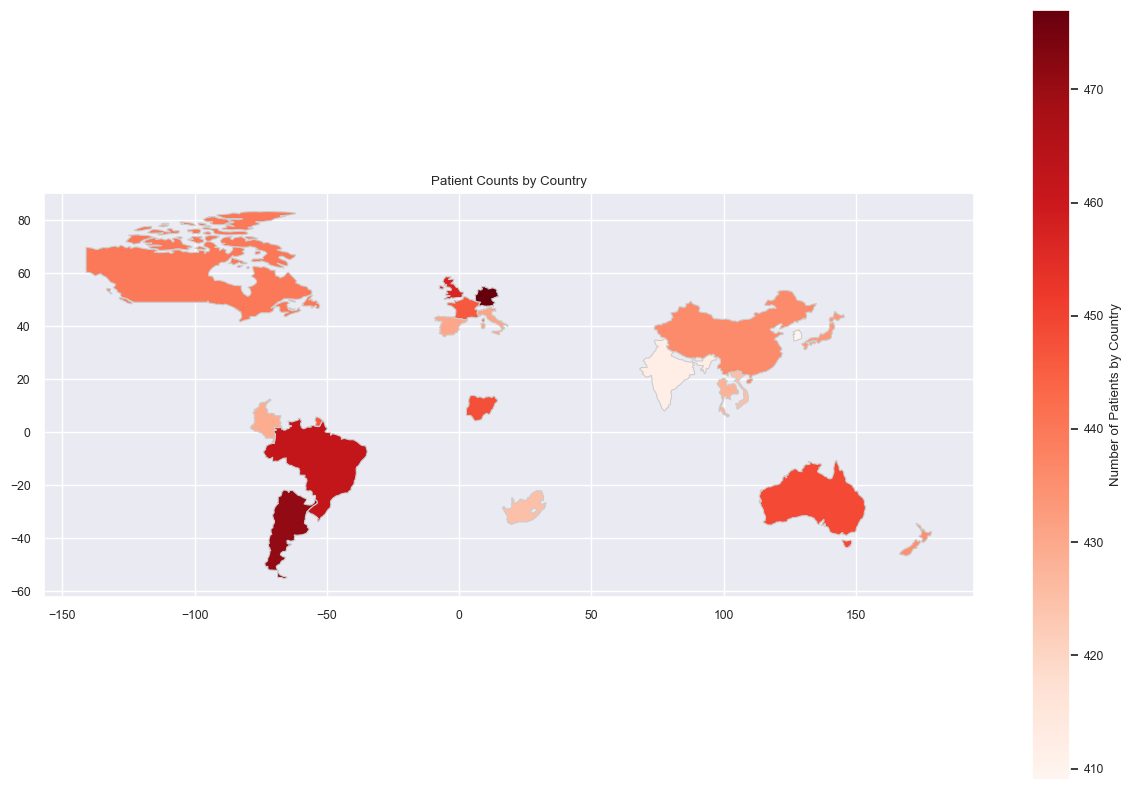

In [107]:
import geopandas as gpd
country_counts = df.groupby('Country').size().reset_index(name='Counts')
print(country_counts)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(country_counts, how='left', left_on='name', right_on='Country')


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Counts', ax=ax, cmap='Reds', linewidth=0.8, edgecolor='0.8',
           legend=True, legend_kwds={'label': "Number of Patients by Country"})
ax.set_title('Patient Counts by Country')
plt.show()

**Most people live in Western Europe and South America**

In [108]:
# visualizing the data through bar
def plot_bar(x,y,title,xlabel="x",ylabel="y"):
    plt.bar(x,y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

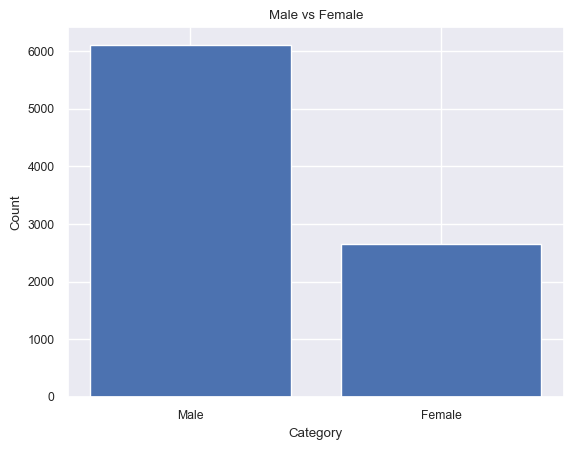

In [109]:
# number of males vs females
count = data["Sex"].value_counts()
x = ["Male","Female"]
y = [count.iloc[0],count.iloc[1]]
plot_bar(x,y,"Male vs Female","Category","Count")

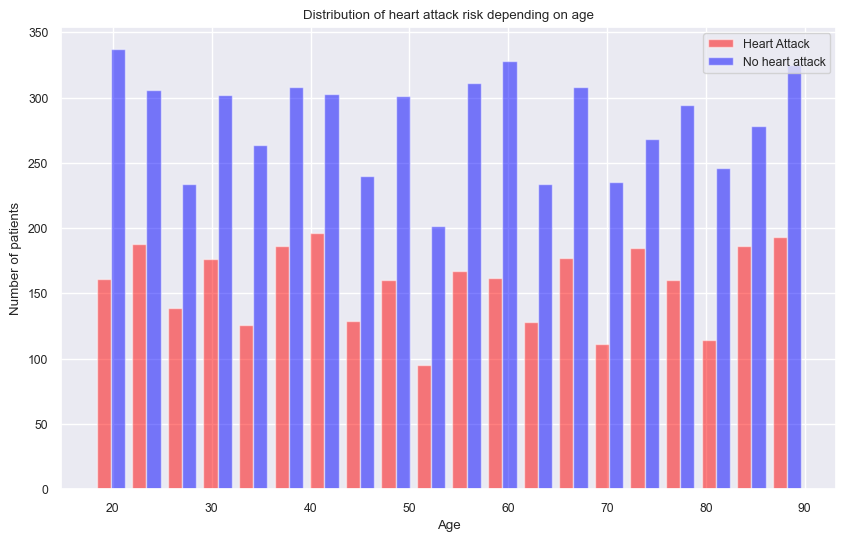

In [110]:
plt.figure(figsize=(10, 6))
plt.hist([data[data['Heart Attack Risk'] == 1]['Age'], data[data['Heart Attack Risk'] == 0]['Age']], bins=20, color=['red', 'blue'], alpha=0.5, label=['Heart Attack', 'No heart attack'])
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Distribution of heart attack risk depending on age')
plt.show()

<Figure size 800x600 with 0 Axes>

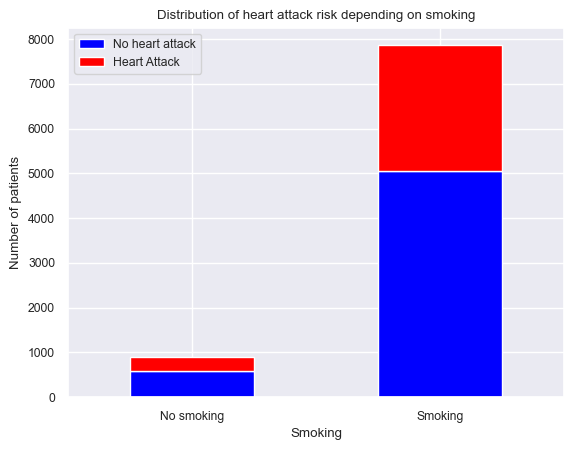

In [111]:
# Distribution of heart attack risk depending on smoking
plt.figure(figsize=(8, 6))
smoking_counts = data.groupby(['Smoking', 'Heart Attack Risk']).size().unstack()
smoking_counts.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.xlabel('Smoking')
plt.ylabel('Number of patients')
plt.xticks([0, 1], ['No smoking', 'Smoking'], rotation=0)
plt.legend(['No heart attack', 'Heart Attack'])
plt.title('Distribution of heart attack risk depending on smoking')
plt.show()

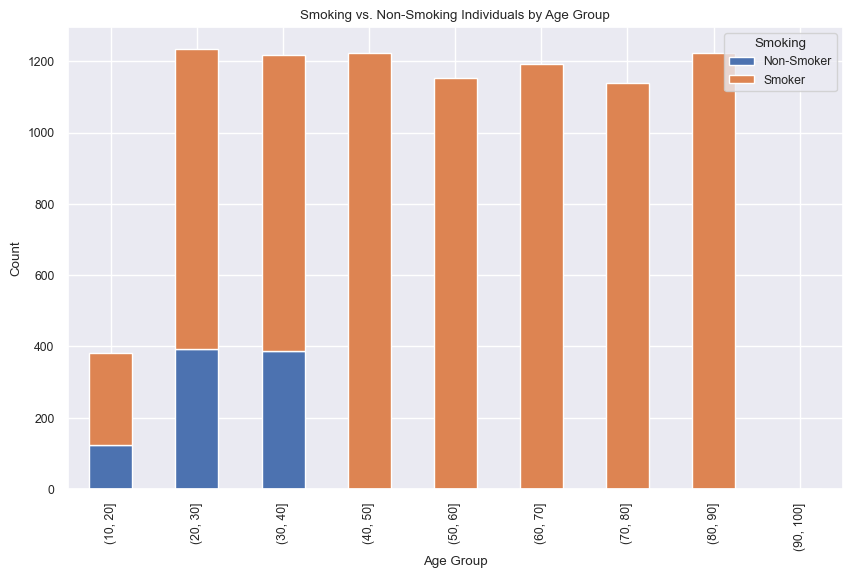

In [112]:
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


df['age_group'] = pd.cut(df['Age'], bins=age_bins)
grouped_counts = df.groupby(['age_group', 'Smoking']).size().unstack(fill_value=0)

# Create the bar chart
grouped_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Smoking vs. Non-Smoking Individuals by Age Group')
plt.legend(title='Smoking', labels=['Non-Smoker', 'Smoker'])
plt.show()


**Most of the people in this data set are smokers**

In [113]:
fil = df[(df['Age'] > 50) & (df['Smoking'] == 0)]
fil.count()


Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Blood_Sistolik_Pres                0
Blood_Diyastolik _Pres             0
age_group                          0
d

**#There is no record of age over 50 and healthy lungs!**

In [114]:
male_df = df[df['Sex']=='Male']
female_df = df[df['Sex']=='Female']

In [115]:
male_chl = male_df['Cholesterol']
female_chl = female_df['Cholesterol']

In [116]:
male_chl.count()

6111

In [117]:
region = df['Continent']
region.unique()

array(['South America', 'North America', 'Europe', 'Asia', 'Africa',
       'Australia'], dtype=object)

In [118]:
income = df['Income']
bmi = df['BMI']
sleep = df['Sleep Hours Per Day']
sedentary = df['Sedentary Hours Per Day']
diet = df['Diet']
exe = df['Exercise Hours Per Week']
alch = df['Alcohol Consumption']
hr = df['Heart Rate']
age = df['Age']

In [119]:
diet.unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [120]:
pivot_table = df.pivot_table(index=['Sleep Hours Per Day'], values=['Income'], aggfunc={'Income': 'mean'})

print(pivot_table)

                            Income
Sleep Hours Per Day               
4                    160372.088908
5                    156403.288994
6                    157748.663009
7                    159090.975591
8                    160953.087733
9                    157095.129195
10                   156245.682908


**There is almost no clear relationship between sleeping hours and income**

In [121]:
income.max()

299954

In [122]:
income.min()

20062

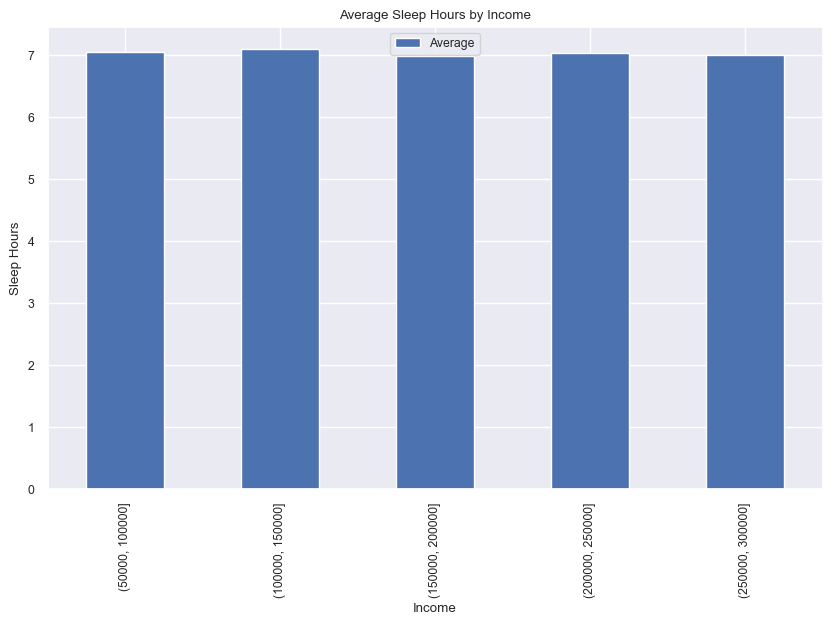

In [123]:
income_bins = [50000, 100000, 150000, 200000, 250000, 300000]  # Example boundaries

# Group by income bins and calculate summary statistics
df['income_bin'] = pd.cut(df['Income'], bins=income_bins)
grouped = df.groupby('income_bin').agg({'Sleep Hours Per Day': ['mean']})


import matplotlib.pyplot as plt
# Plot the grouped bar chart
grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Income')
plt.ylabel('Sleep Hours')
plt.title('Average Sleep Hours by Income')
plt.legend(['Average'])
plt.show()

In [124]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [125]:
df['Diet'] = df['Diet'].astype('category')
# Get the category codes
df['Diet_enc'] = df['Diet'].cat.codes

# 0: Average, 1: Healthy, 2: Unhealthy

In [126]:
df['Diet_enc']

0       0
1       2
2       1
3       0
4       2
       ..
8758    1
8759    1
8760    0
8761    2
8762    1
Name: Diet_enc, Length: 8763, dtype: int8

<Axes: ylabel='Density'>

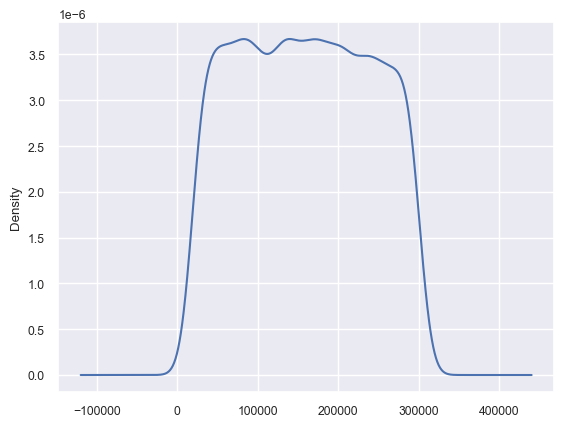

In [127]:
df['Income'].plot(kind='kde')


<Axes: ylabel='Frequency'>

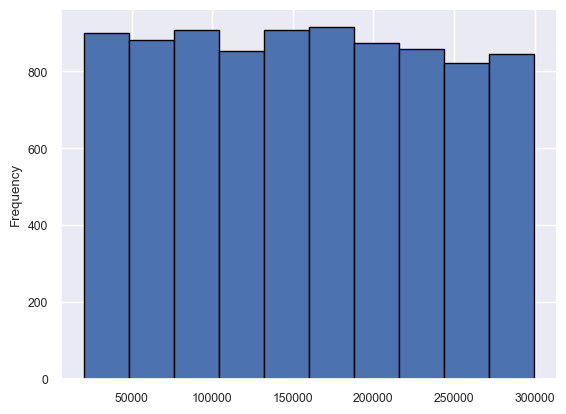

In [128]:
df['Income'].plot(kind='hist', edgecolor='black')


<Axes: ylabel='Density'>

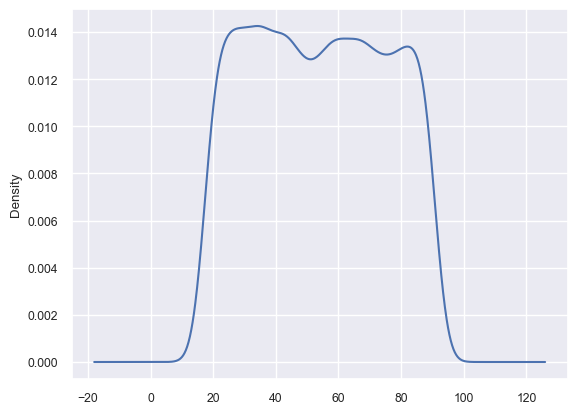

In [129]:
df['Age'].plot(kind='kde')

<Axes: ylabel='Frequency'>

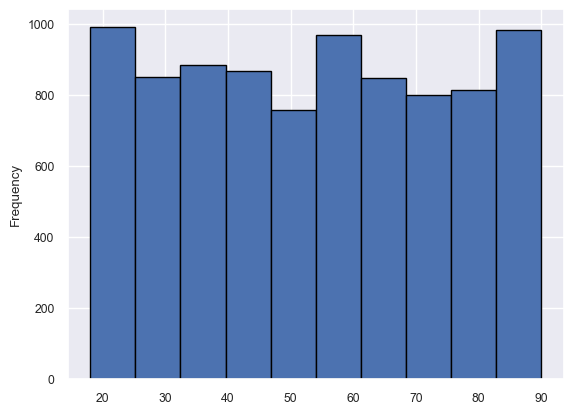

In [130]:
df['Age'].plot(kind='hist', edgecolor='black')

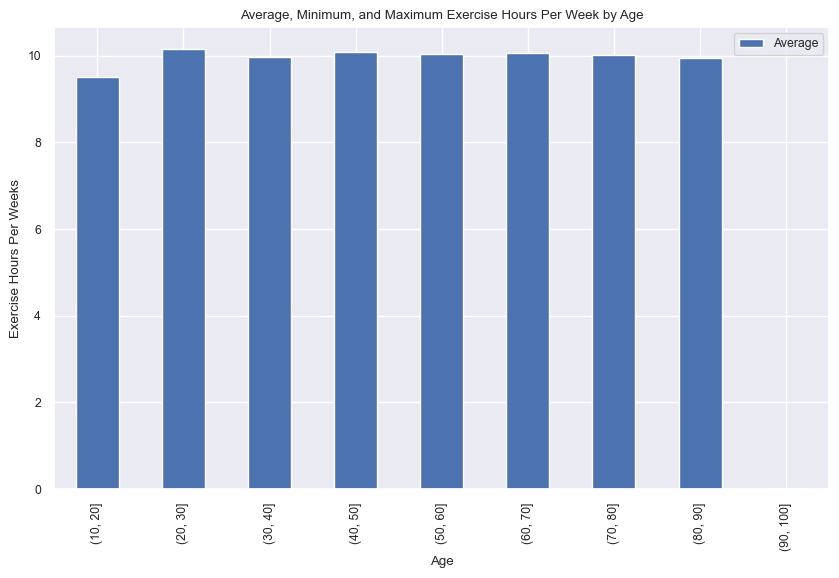

In [131]:
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


# Group by income bins and calculate summary statistics
df['age_bin'] = pd.cut(df['Age'], bins=age_bins)
grouped = df.groupby('age_bin').agg({'Exercise Hours Per Week': ['mean']})


import matplotlib.pyplot as plt
# Plot the grouped bar chart
grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Exercise Hours Per Weeks')
plt.title('Average, Minimum, and Maximum Exercise Hours Per Week by Age')
plt.legend(['Average', 'Minimum', 'Maximum'])
plt.show()

In [132]:
pivot_table = df.pivot_table(index=['Stress Level', 'Medication Use'], values=['Age'], aggfunc={'Age': 'mean'})

print(pivot_table)

                                   Age
Stress Level Medication Use           
1            0               53.995327
             1               53.361556
2            0               51.924779
             1               53.603037
3            0               52.781176
             1               53.808126
4            0               53.726708
             1               53.290398
5            0               53.876682
             1               52.673913
6            0               53.026966
             1               54.473171
7            0               54.490066
             1               54.857778
8            0               54.602015
             1               53.174274
9            0               53.450237
             1               53.333333
10           0               55.065169
             1               54.907407


In [133]:
pivot_table = df.pivot_table(index=['Stress Level', 'Diet_enc'], values=['Sedentary Hours Per Day'], aggfunc={'Sedentary Hours Per Day': 'mean'})

print(pivot_table)

                       Sedentary Hours Per Day
Stress Level Diet_enc                         
1            0                        6.234023
             1                        6.502404
             2                        5.836017
2            0                        5.966846
             1                        5.735468
             2                        5.823517
3            0                        6.185626
             1                        6.167504
             2                        5.769036
4            0                        5.679131
             1                        5.975068
             2                        5.938679
5            0                        5.920868
             1                        6.184730
             2                        6.045951
6            0                        5.953896
             1                        6.369212
             2                        5.971025
7            0                        5.760892
             